In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy import sparse

In [2]:
X = np.loadtxt('unscaled_featmat.txt')
Y = np.loadtxt('unscaled_labels.txt')

In [3]:
X.shape,Y.shape

((11682, 21), (11682, 21))

In [4]:
Y_list = []
for row in Y:
    for i,element in enumerate(row):
        if element == 1:
            Y_list.append(i+1)
            continue

Nearest teammember rank  1  . Percent of all passes =  27.418250299606232
Nearest teammember rank  2  . Percent of all passes =  19.174798835815785
Nearest teammember rank  3  . Percent of all passes =  11.50487930148947
Nearest teammember rank  4  . Percent of all passes =  7.669919534326314
Nearest teammember rank  5  . Percent of all passes =  5.213148433487417
Nearest teammember rank  6  . Percent of all passes =  3.9291217257318953
Nearest teammember rank  7  . Percent of all passes =  2.6022941277178564
Nearest teammember rank  8  . Percent of all passes =  2.131484334874165
Nearest teammember rank  9  . Percent of all passes =  1.891799349426468
Nearest teammember rank  10  . Percent of all passes =  1.275466529703818


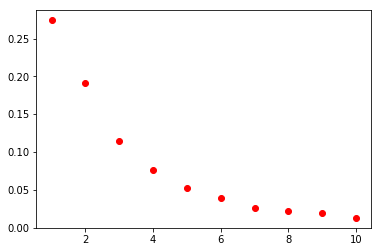

In [65]:
Frac_pass_list=[]

for i in range(1,11):
    print ('Nearest teammember rank ',i,' . Percent of all passes = ',Y_list.count(i)*100/Y.shape[0])
    Frac_pass_list.append(Y_list.count(i)/Y.shape[0])
    
    plt.plot(i,Y_list.count(i)/Y.shape[0],'ro')    
plt.show()

In [63]:
# Logistic Regressin on the model

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_list, random_state = 10,test_size=0.2)
sXtr = sparse.csr_matrix(X_train)
sXte = sparse.csr_matrix(X_test)

In [71]:
log = LogisticRegression(penalty='l2',verbose=True)
log.fit(sX,Y_train)
training_accuracy = log.score(sX, Y_train)
test_accuracy = log.score(sXte, Y_test)

print("Accuracy on training data: %0.2f" %(training_accuracy))
print("Accuracy on test data: %0.2f" %(test_accuracy))

[LibLinear]Accuracy on training data: 0.28
Accuracy on test data: 0.26


In [75]:
predicted = log.predict(sXte)
list(predicted).count(1)/len(predicted)

0.7419768934531451

In [76]:
# Modify Y
Y_list = []
for row in Y:
    for i,element in enumerate(row):
        if element == 1:
            Y_list.append(i+1)
            continue

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]])